<a href="https://colab.research.google.com/github/madeline-evenson/Northwestern-CIERA-Python-Intro/blob/main/Challenge_5_Galaxy_Rotation_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/master/Module_2/data/M33velocities.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2025-06-07 00:03:42--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/master/Module_2/data/M33velocities.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376 [text/plain]
Saving to: ‘M33velocities.csv’

M33velocities.csv   100%[===================>]     376  --.-KB/s    in 0s      

2025-06-07 00:03:42 (12.3 MB/s) - ‘M33velocities.csv’ saved [376/376]



# Galaxy Rotation Curves

## Section 1: Background
![NGC3521](https://github.com/mcstroh/REACHpy/blob/ideaspy_updates/Module_2/images/NGC3521-LRGB-1024c.jpg?raw=1)

We've already talked quite a bit about the rotation curve of the Solar System, but that isn't the only place where rotation curves are useful! Another place where they have frequently been used is in understanding how matter is distributed in galaxies. The equation we used in previous challenge problems

\begin{equation}
v = \sqrt{\frac{G \, M}{R}}
\end{equation}

applies for the mass enclosed within radius R, or

\begin{equation}
v(R) = \sqrt{\frac{G \, M_{enclosed}(R)}{R}}.
\end{equation}

The mass enclosed is the sum of the mass inside of radius $R$. Thus, if you can measure the rotation curve of a galaxy, you can calculate where mass is located within the galaxy.

## Section 2: Loading the data

We will be using a file named `M33velocities.csv` consisting of data from a galaxy named M33. The file contains two columns saved in a comma separated value (csv) format:
 - distance from the center of the galaxy (in kpc), and
 - velocity (in km/s).

Read in the data from the file using NumPy and save the data from each column in separate arrays.

In [2]:
# Read in data
import numpy as np
data = np.loadtxt('M33velocities.csv', delimiter=',')

distances = []
velocities = []

for row in data:
    distances.append(row[0])
    velocities.append(row[1])

## Section 3: Create a rotation curve figure

Create a figure with velocity along the y-axis and radius along the x-axis. Title your figure 'M33 Rotation Curve' and properly label both axes.

Text(0, 0.5, 'Velocity (km/s)')

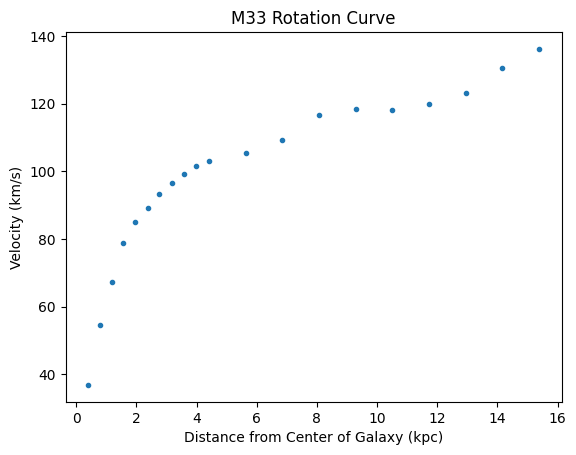

In [3]:
# Plot
import matplotlib.pyplot as plt

plt.plot(distances, velocities, '.')
plt.title('M33 Rotation Curve')
plt.xlabel('Distance from Center of Galaxy (kpc)')
plt.ylabel('Velocity (km/s)')

Using numpy, calculate the mass enclosed within each radius, $R$, from the above equation and the velocity and radius data. Pay attention to units while making this calculation.

In [17]:
# Calculate mass enclosed
G = 6.626e-11
m_sun = 2e30
m_enclosed = []

for i in range(len(distances)):
    m_enclosed.append(((velocities[i]**2 * distances[i] / G) / m_sun))

Astronomers often express large quantities of mass in terms of solar masses. If you haven't already, convert your mass enclosed into units of solar mass.

In [ ]:
# Convert to solar masses --> done in previous step

Create a figure showing the mass enclosed (y-axis) against the radius (x-axis). Adjust your title and y-axis as necessary for this new figure.

From images of M33, we see that stars only go out to a radius of 7 kpc. Add a vertical line in this figure at 7 kpc (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html may be useful).

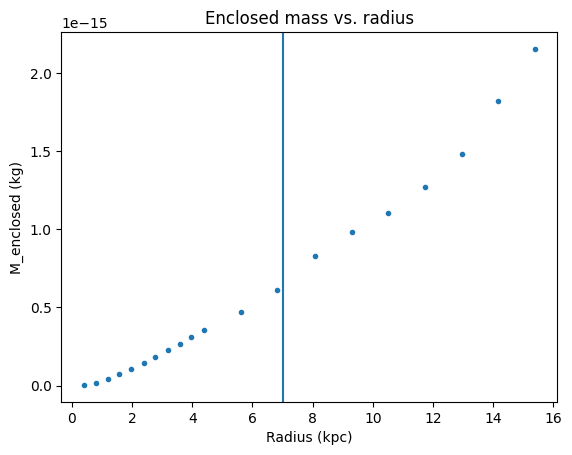

In [10]:
# Create figure
plt.plot(distances, m_enclosed, '.')
plt.title('Enclosed mass vs. radius')
plt.xlabel('Radius (kpc)')
plt.ylabel('M_enclosed (kg)')
plt.axvline(7)

What do you notice about the behaviour of the mass of the galaxy as you go to larger and larger radii? Does the mass drop significantly at any point? Change the font color below to learn more!

In [ ]:
# Comment here
#the mass grows exponentially bigger and bigger as the radius increases
#that is because larger radii enclosed larger amounts of mass

You should see that even beyond the 15 kpc outer edge of the galaxy, the mass enclosed still continues to increase.

The mass we can't see is dark matter. You've just uncovered one of the main pieces of evidence indicating that there is a significant amount of matter that we can't see, hidden within M33. The only way we can detect it is in how it exerts a gravitational force on other matter, through this rotation curve.

## Section 4: Solar System comparison

For comparison, use the velocities and radii of planets in the Solar System to calculate the mass enclosed as a function of radius. If you have worked on Challenge 2, you may have already collected this information into NumPy arrays.

This figure may look a little better if you plot the x-axis in Astronomical Units (AU) and change the x-axis to a logarithmic scale (discussed in Challenge 4).

Text(0.5, 1.0, 'Enclosed Mass of Solar System')

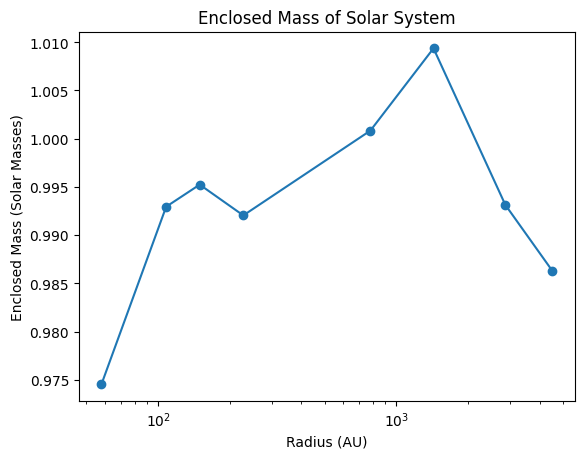

In [25]:
# Create array of orbital radii
km_to_au = 6.67430e-11
radii = np.array([57.9e9, 108.2e9, 149.6e9, 228.0e9, 778.5e9, 1432.0e9, 2867.0e9, 4515.0e9])

# Create array of orbital velocities
v_accepted = np.array([47.4e3, 35.0e3, 29.8e3, 24.1e3, 13.1e3, 9.7e3, 6.8e3, 5.4e3])
m_enclosed = v_accepted**2 * radii / G

m_enclosed_solar = m_enclosed / m_sun

# Create a figure
plt.plot(radii / 1e9, m_enclosed_solar, marker='o')
plt.xscale('log')
plt.xlabel('Radius (AU)')
plt.ylabel('Enclosed Mass (Solar Masses)')
plt.title('Enclosed Mass of Solar System')

Does the mass enclosed in the solar system change significantly as you increase your distance from the Sun? How does this compare to the galaxy example?

In [ ]:
# Comment here
#depending on what planet is "added" to the enclosed mass, the enclosed mass sometimes significantly changes. however, because each planet gets further and further away from the sun, more and more enclosed volume is increased